# Some startup code

import packages needed & load dataset

In [1]:
from sklearn import tree, preprocessing
import numpy as np
from loaddata import get_instances_from_csv
from startEvaluation import evaluation
from matplotlib import pyplot as plt
%matplotlib inline
DATAPATH = "../sub_datasets/subset_0.csv"
DATAPATH1 = "../sub_datasets/subset_1.csv"
RANDOM_SEED=42
TRAINROWS = 400000
EVALROWS = 400000

training_data = get_instances_from_csv(DATAPATH, "train", numrows=TRAINROWS)
eval_data = get_instances_from_csv(DATAPATH1,"train", numrows=EVALROWS)
print("training data  : %s rows"%training_data[0].shape[0])
print("evaluation data: %s rows"%eval_data[0].shape[0])

kernels = ['rbf', 'linear', 'sigmoid', 'poly']

scaler = preprocessing.StandardScaler()
scaler.fit(training_data[0])
print(scaler)

def print_prediction(training_data, eval_data, *args, **kwargs):

    #print("start training")
    clf = tree.DecisionTreeClassifier(random_state=42, *args, **kwargs)
    clf = clf.fit(training_data[0], training_data[1])
    #print("finished training svm %s"%clf)
    evt = evaluation(training_data[1], clf.predict(training_data[0]))
    #print("accuracy on traning data:")
    a1 = evt.print_only_accuracy()
    eve = evaluation(eval_data[1], clf.predict(eval_data[0]))
    #print("accuracy on evaluation data:")
    a2 = eve.print_only_accuracy()
    return (a1, a2)


/usr/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


training data  : 399999 rows
evaluation data: 399999 rows
StandardScaler(copy=True, with_mean=True, with_std=True)


# Simple performance test
Just calling the evaluation-function with default parameters.

In [2]:
print_prediction(training_data, eval_data)

1.0
0.683494208736


(1.0, 0.6834942087355218)

# Counteracting overfitting
The accuracy on the training data is a clear sign of overfitting. One method to get a more gernal model is to limit the minimal number of training samples that are gathered in each leaf node before a node is split.

1.0
0.683494208736
0.935472338681
0.688971722429
0.872137180343
0.695321738304
0.80889202223
0.705514263786
0.770934427336
0.710061775154
0.743219358048
0.711144277861
0.72235180588
0.705921764804
0.704479261198
0.695409238523
0.683044207611
0.678201695504
0.658701646754
0.655266638167


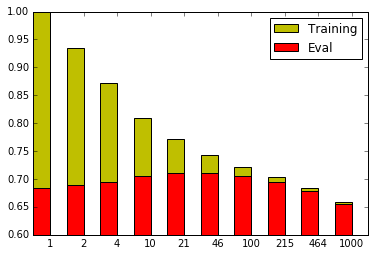

In [4]:
# try to use more samples per leaf
plot_data_num = []
plot_data_accuracy = []
plot_data_accuracy1 = []
for num in np.logspace(0, 3, 10):
    a = print_prediction(training_data, eval_data, min_samples_leaf=num)
    plot_data_num.append(int(num))
    plot_data_accuracy.append(a[0])
    plot_data_accuracy1.append(a[1])

plot1 =  plt.bar(np.arange(len(plot_data_accuracy)), plot_data_accuracy, width=0.5, color="y")

plot = plt.bar(np.arange(len(plot_data_accuracy1)), plot_data_accuracy1, width=0.5, color="r")
plt.legend((plot1[0], plot[0]), ('Training', 'Eval'))
plt.ylim(ymin=.6)
plt.xticks(np.arange(len(plot_data_num))+0.5, plot_data_num)

plt.show()

As you can see the overall accuracy on the training data is 1 if no leaf-pruning is done, which is a clear sign of overfitting.
By using more values in each leaf nodes of the decision tree overfitting is reduced and the accuracy on the training data is rising as the learned model is more general.

Similarly, we can define a number of samples that need to be gathered before the node is split, further generalizing our model. As we keep applying the first technique there is not a great effect, but you can see that training-error gets closer to the evaluation-error, showing us that a more general model is found.

0.773169432924
0.709974274936
0.773169432924
0.709974274936
0.773169432924
0.709974274936
0.770449426124
0.710551776379
0.757509393773
0.712421781054
0.744501861255
0.712121780304
0.732341830855
0.709004272511
0.721796804492
0.706006765017
0.709869274673
0.698641746604
0.693844234611
0.686539216348


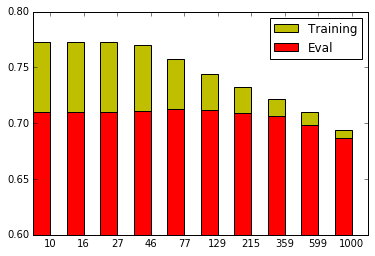

In [11]:
# try to use more samples per leaf
plot_data_num = []
plot_data_accuracy = []
plot_data_accuracy1 = []
for num in np.logspace(1, 3, 10):
    a = print_prediction(training_data, eval_data, min_samples_split=num, min_samples_leaf=20)
    plot_data_num.append(int(num))
    plot_data_accuracy.append(a[0])
    plot_data_accuracy1.append(a[1])

plot1 =  plt.bar(np.arange(len(plot_data_accuracy)), plot_data_accuracy, width=0.5, color="y")

plot = plt.bar(np.arange(len(plot_data_accuracy1)), plot_data_accuracy1, width=0.5, color="r")
plt.legend((plot1[0], plot[0]), ('Training', 'Eval'))
plt.ylim(ymin=.6)
plt.xticks(np.arange(len(plot_data_num))+0.5, plot_data_num)

plt.show()

Let's check if the value used for min_samples_leaf is still reasonable.

0.790579476449
0.708624271561
0.788624471561
0.709666774167
0.78533196333
0.710181775454
0.777136942842
0.711034277586
0.767484418711
0.711034277586
0.743219358048
0.711144277861
0.72235180588
0.705921764804
0.704479261198
0.695409238523
0.683044207611
0.678201695504
0.658701646754
0.655266638167


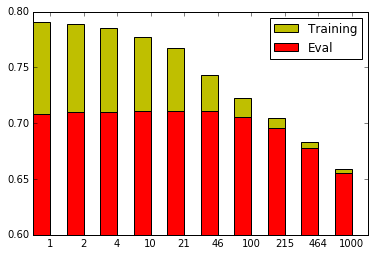

In [7]:
# try to use more samples per leaf
plot_data_num = []
plot_data_accuracy = []
plot_data_accuracy1 = []
for num in np.logspace(0, 3, 10):
    a = print_prediction(training_data, eval_data, min_samples_leaf=num, min_samples_split=50)
    plot_data_num.append(int(num))
    plot_data_accuracy.append(a[0])
    plot_data_accuracy1.append(a[1])

plot1 =  plt.bar(np.arange(len(plot_data_accuracy)), plot_data_accuracy, width=0.5, color="y")

plot = plt.bar(np.arange(len(plot_data_accuracy1)), plot_data_accuracy1, width=0.5, color="r")
plt.legend((plot1[0], plot[0]), ('Training', 'Eval'))
plt.ylim(ymin=.6)
plt.xticks(np.arange(len(plot_data_num))+0.5, plot_data_num)

plt.show()

0.726319315798
0.694231735579
0.726319315798
0.694231735579
0.685379213448
0.653616634042
0.726319315798
0.694231735579
0.740541851355
0.708101770254
0.74291185728
0.709019272548
0.745716864292
0.710754276886
0.747754369386
0.712069280173
0.747754369386
0.712069280173


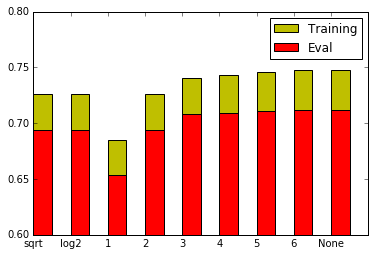

In [8]:
plot_data_num = []
plot_data_accuracy = []
plot_data_accuracy1 = []
for num in ["sqrt", "log2", 1, 2, 3, 4, 5, 6, None]:
    a = print_prediction(training_data, eval_data, min_samples_split=50, min_samples_leaf=40, max_features=num)
    plot_data_num.append(num)
    plot_data_accuracy.append(a[0])
    plot_data_accuracy1.append(a[1])

plot1 =  plt.bar(np.arange(len(plot_data_accuracy)), plot_data_accuracy, width=0.5, color="y")

plot = plt.bar(np.arange(len(plot_data_accuracy1)), plot_data_accuracy1, width=0.5, color="r")
plt.legend((plot1[0], plot[0]), ('Training', 'Eval'))
plt.ylim(ymin=.6)
plt.xticks(np.arange(len(plot_data_num)), plot_data_num)

plt.show()

Last but not least we can check if the different strategies for chosing the split-criteria have an impact on classification accuracy.

In [3]:
criterions = ['gini', 'entropy']
for crit in criterions:
    print(crit)
    print_prediction(training_data, eval_data, criterion=crit, min_samples_leaf=20, min_samples_split=80)

gini
0.75651189128
0.712494281236
entropy
0.752684381711
0.714529286323


# Scaling the Data
Some methods of machine learning require scaling the data. Somewhat unsuprisingly for decision-tree learning this is not the case.

In [10]:
training_scaled = [scaler.transform(training_data[0]), training_data[1]]
eval_scaled = [scaler.transform(eval_data[0]), eval_data[1]]

print("unscaled:")
print_prediction(training_data, eval_data, min_samples_split=80, min_samples_leaf=20)
print("scaled:")
print_prediction(training_scaled, eval_scaled, min_samples_split=80, min_samples_leaf=20)

unscaled:
0.747754369386
0.712069280173
scaled:
0.747754369386
0.712051780129


(0.74775436938592343, 0.71205178012945036)